In [28]:
import os, sys, inspect

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
if os.path.basename(currentdir) == 'notebooks':
    parentdir = os.path.dirname(currentdir)
    sys.path.insert(0,parentdir)
elif os.path.basename(currentdir) == 'celldeposit-condenser':
    currentdir = os.path.join(currentdir, 'notebooks')
    os.chdir(currentdir)

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from water_at_saturation_properties import density, enthalpy, heat_capacity, conductivity, viscosity
from water_at_saturation_properties import saturation_temperature, vapour_density, vaporization_enthalpy

In [29]:
def simplified_model_for_fit1(x, a00, a01, a02, a03):
    
    c = np.array([a00, a01, a02, a03])
    
    return simplified_model1(x, c)

def simplified_model_for_fit2(x, a00, a01, a02, a03, a04, a05):
    
    c = np.array([a00, a01, a02, a03, a04, a05])
    
    return simplified_model2(x, c)

In [30]:
def simplified_model(x, c):
    
    if c.shape[0] == 4:
        return simplified_model1(x,c)
    else:
        return simplified_model2(x,c)

def simplified_model1(x,c):

    f = 0.

    for i in range(c.shape[0]):
        f += c[i] * (x ** i)
        
    return f

def simplified_model2(x,c):

    f = 0.

    for i in range(c.shape[0]-2):
        f += c[i] * (x ** i)
        
    f += c[-2] * np.log(c[-1]*x)

    return f

In [31]:
def calculate_output(func,X,*args):
    Z = np.zeros_like(X)
    for i in range(X.shape[0]):                     
        Z[i,] = func(X[i],*args)
    return Z

In [32]:
def fit(model, X, simplified_model_for_fit):

    Z = calculate_output(model,X)
    c, pcov = curve_fit(simplified_model_for_fit, X, Z)
    
    Z_fit = simplified_model(X,c)
    
    # residual sum of squares
    ss_res = np.sum((Z - Z_fit) ** 2)

    # total sum of squares
    ss_tot = np.sum((Z - np.mean(Z)) ** 2)

    # r-squared
    r2 = 1 - (ss_res / ss_tot)
    
    return (c, Z_fit, Z, r2)

def fit1(model, X):
    return fit(model, X, simplified_model_for_fit1)

def fit2(model, X):
    return fit(model, X, simplified_model_for_fit2)


In [33]:
from iapws.iapws97 import _Region4, _Region1
from iapws._iapws import _ThCond, _Viscosity

In [34]:
limits = [0.01, 1]
npoints = 50
X = 1e5*np.hstack((np.linspace(0.01, 0.1, num=npoints), np.linspace(0.1, 1, num=npoints)))
#print(X)
out = fit1(vapour_density, X)
#print(out)

VAPOUR DENSITY


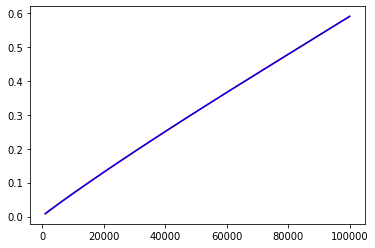

Parameters: [ 2.37652486e-03  6.65298567e-06 -1.31408942e-11  5.49191279e-17]
R2: 0.9999940245534227


In [35]:
print("VAPOUR DENSITY")
c, Z_fit, Z, r2 = fit1(vapour_density, X)
plt.plot(X, Z, 'r') # plotting t, a separately 
plt.plot(X, Z_fit, 'b') # plotting t, b separately 
plt.show()
print("Parameters:",c)
print("R2:", r2)
c_dict = dict()
c_dict['vapour_density'] = c

VAPOUR TOTAL COMPRESSIBILITY


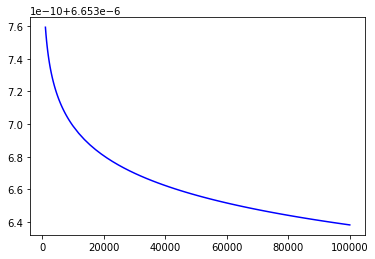

Parameters: [ 2.37652486e-03  6.65298567e-06 -1.31408942e-11  5.49191279e-17]
Parameters: [ 6.65298567e-06 -2.62817883e-11  1.64757384e-16]
R2: 0.9999940245534227


In [9]:
print("VAPOUR TOTAL COMPRESSIBILITY")
c_v_density = c_dict['vapour_density']
c = np.zeros((c_v_density.shape[0]-1,))
i = 0
for ci in c_v_density:
    if i > 0:
        c[i-1] = i*ci
    i += 1
Z_fit = simplified_model(X,c)
plt.plot(X, Z_fit, 'b') # plotting t, b separately 
plt.show()
print("Parameters:",c_v_density)
print("Parameters:",c)
print("R2:", r2)
c_dict['vapour_total_compressibility'] = c

SATURATION TEMPERATURE


/Users/jaimenms/WorkingFolder/study-daetools/venv/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in log


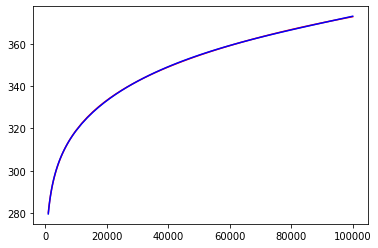

Parameters: [ 2.48404503e+02  4.67253143e-04 -4.09934326e-09  1.72548088e-14
  1.53833719e+01  7.37059350e-03]
R2: 0.999980656665439


In [10]:
print("SATURATION TEMPERATURE")
c, Z_fit, Z, r2 = fit2(saturation_temperature, X)
plt.plot(X, Z, 'r') # plotting t, a separately 
plt.plot(X, Z_fit, 'b') # plotting t, b separately 
plt.show()
print("Parameters:",c)
print("R2:", r2)
c_dict['saturation_temperature'] = c

DENSITY


/Users/jaimenms/WorkingFolder/study-daetools/venv/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in log


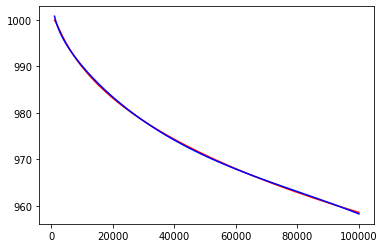

Parameters: [ 1.01836874e+03 -6.74336724e-04  6.06149751e-09 -2.58678900e-14
 -2.25901488e+00  1.82321986e+00]
R2: 0.9997931282053976


In [15]:
print("DENSITY")
c, Z_fit, Z, r2 = fit2(density, X)
plt.plot(X, Z, 'r') # plotting t, a separately 
plt.plot(X, Z_fit, 'b') # plotting t, b separately 
plt.show()
print("Parameters:",c)
print("R2:", r2)
c_dict['density'] = c

ENTHALPY


/Users/jaimenms/WorkingFolder/study-daetools/venv/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in log


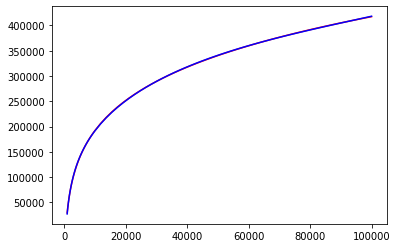

Parameters: [-6.08505954e+05  1.94062497e+00 -1.68186492e-05  7.06340277e-11
  6.43850329e+04  1.88345119e+01]
R2: 0.9999818577830879


In [18]:
print("ENTHALPY")
c, Z_fit, Z, r2 = fit2(enthalpy, X)
plt.plot(X, Z, 'r') # plotting t, a separately 
plt.plot(X, Z_fit, 'b') # plotting t, b separately 
plt.show()
print("Parameters:",c)
print("R2:", r2)
c_dict['enthalpy'] = c

VISCOSITY


/Users/jaimenms/WorkingFolder/study-daetools/venv/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in log


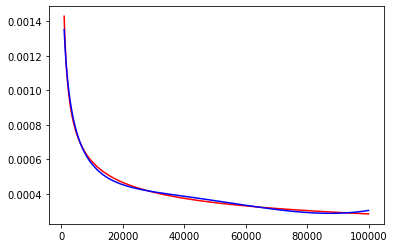

Parameters: [ 5.17865934e-03  2.55434669e-08 -3.01011890e-13  1.39267038e-18
 -4.25522968e-04  8.56155473e+00]
R2: 0.9968829341847661


In [20]:
print("VISCOSITY")
c, Z_fit, Z, r2 = fit2(viscosity, X)
plt.plot(X, Z, 'r') # plotting t, a separately 
plt.plot(X, Z_fit, 'b') # plotting t, b separately 
plt.show()
print("Parameters:",c)
print("R2:", r2)
c_dict['viscosity'] = c

HEAT_CAPACITY


/Users/jaimenms/WorkingFolder/study-daetools/venv/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in log


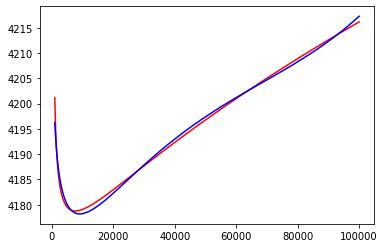

Parameters: [ 4.22512004e+03  1.88493270e-03 -1.78694338e-08  7.96209770e-14
 -1.44442248e+01  8.41137683e-03]
R2: 0.9947199031608539


In [22]:
print("HEAT_CAPACITY")
c, Z_fit, Z, r2 = fit2(heat_capacity, X)
plt.plot(X, Z, 'r') # plotting t, a separately 
plt.plot(X, Z_fit, 'b') # plotting t, b separately 
plt.show()
print("Parameters:",c)
print("R2:", r2)
c_dict['heat_capacity'] = c

CONDUCTIVITY


/Users/jaimenms/WorkingFolder/study-daetools/venv/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in log


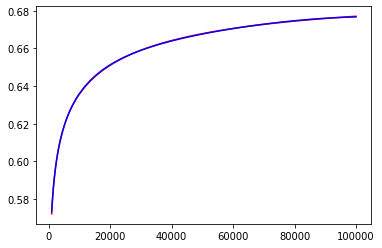

Parameters: [ 3.20875162e-01 -6.91454761e-07  6.24672812e-12 -2.71195484e-17
  2.96320329e-02  5.13558596e+00]
R2: 0.9999293230900341


In [24]:
print("CONDUCTIVITY")
c, Z_fit, Z, r2 = fit2(conductivity, X)
plt.plot(X, Z, 'r') # plotting t, a separately 
plt.plot(X, Z_fit, 'b') # plotting t, b separately 
plt.show()
print("Parameters:",c)
print("R2:", r2)
c_dict['conductivity'] = c

VAPORIZATION ENTHALPY


/Users/jaimenms/WorkingFolder/study-daetools/venv/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in log


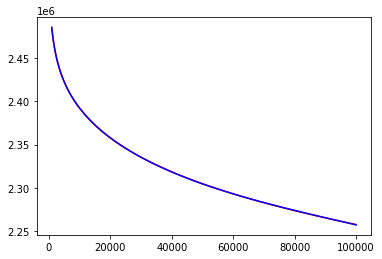

Parameters: [ 2.96216663e+06 -1.20540634e+00  9.85003104e-06 -4.10994887e-11
 -3.61781700e+04  5.09057715e+02]
R2: 0.9999827196642053


In [26]:
print("VAPORIZATION ENTHALPY")
c, Z_fit, Z, r2 = fit2(vaporization_enthalpy, X)
plt.plot(X, Z, 'r') # plotting t, a separately 
plt.plot(X, Z_fit, 'b') # plotting t, b separately 
plt.show()
print("Parameters:",c)
print("R2:", r2)
c_dict['vaporization_enthalpy'] = c

In [27]:
import pprint
pprint.pprint(c_dict)

{'conductivity': array([ 3.20875162e-01, -6.91454761e-07,  6.24672812e-12, -2.71195484e-17,
        2.96320329e-02,  5.13558596e+00]),
 'density': array([ 1.01836874e+03, -6.74336724e-04,  6.06149751e-09, -2.58678900e-14,
       -2.25901488e+00,  1.82321986e+00]),
 'enthalpy': array([-6.08505954e+05,  1.94062497e+00, -1.68186492e-05,  7.06340277e-11,
        6.43850329e+04,  1.88345119e+01]),
 'heat_capacity': array([ 4.22512004e+03,  1.88493270e-03, -1.78694338e-08,  7.96209770e-14,
       -1.44442248e+01,  8.41137683e-03]),
 'saturation_temperature': array([ 2.48404503e+02,  4.67253143e-04, -4.09934326e-09,  1.72548088e-14,
        1.53833719e+01,  7.37059350e-03]),
 'vaporization_enthalpy': array([ 2.96216663e+06, -1.20540634e+00,  9.85003104e-06, -4.10994887e-11,
       -3.61781700e+04,  5.09057715e+02]),
 'vapour_density': array([ 2.37652486e-03,  6.65298567e-06, -1.31408942e-11,  5.49191279e-17]),
 'vapour_total_compressibility': array([ 6.65298567e-06, -2.62817883e-11,  1.647573